<a href="https://colab.research.google.com/github/Hanifanur18/Data_analis/blob/main/%5BPROJECT%5D%20Customer%20Segmentation_%20by%20HanifaNur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **I.  Business Understanding 👜**

Revo Bank is a bank based in Europe. Performance Management (PM) team aims to encourage existing customers to use Revo Bank credit card. For helping their job desk, a dataset of clients and their sales over the last three years (36 months) will be analyzed. **The goal of this analysis is to
understand customer segmentation** and identify business opportunities to improve Revo Bank Revenue.

Dataset : https://drive.google.com/file/d/1dXE7wrsL37LhWl962gqluv6ZOuEnn_zG/view

Data dictionary : https://docs.google.com/spreadsheets/d/1YO7D80qVsSC73J1ERl-GqxYYLLDqdjE5/edit?gid=1595356290#gid=1595356290

# **II. Import library and data** 📑


In [ ]:
# import libraries for read and manipulate data
import gdown
import pandas as pd
from datetime import datetime
# import libraries for create charts
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import numpy library
import numpy as np
# Import libraries from scipy.stats for statistical tests
from scipy.stats import shapiro, skew

# Import libraries from sklearn.preprocessing for data scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Import libraries from sklearn.cluster for clustering algorithms
from sklearn import cluster

# Untuk melakukan analisis siluet untuk k-means clustering
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
# upload dataset
url = "https://drive.google.com/file/d/1dXE7wrsL37LhWl962gqluv6ZOuEnn_zG/view?usp=drive_link"
gdown.download(url, 'sales_data.csv', quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1dXE7wrsL37LhWl962gqluv6ZOuEnn_zG
To: /content/sales_data.csv
100%|██████████| 685k/685k [00:00<00:00, 74.8MB/s]


'sales_data.csv'

In [ ]:
# load dataset
df = pd.read_csv('/content/sales_data.csv')
df_backup = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12559 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_id               12559 non-null  int64  
 1   account_activity_level   12559 non-null  object 
 2   customer_value_level     12559 non-null  object 
 3   MOB                      12559 non-null  float64
 4   flag_female              12559 non-null  int64  
 5   avg_sales_L36M           11820 non-null  float64
 6   cnt_sales_L36M           12559 non-null  int64  
 7   last_sales               12559 non-null  float64
 8   month_since_last_sales   12559 non-null  int64  
 9   count_direct_promo_L12M  12559 non-null  int64  
 10  birth_date               12559 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


In [ ]:
df.head(10)

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
0,100000006,X,A,91.0,0,25000.0,1,25000.0,26,5,1996-11-03
1,100000038,X,A,69.0,0,9000.0,5,10000.0,25,10,1971-04-24
2,100000382,X,A,123.0,1,17330.0,6,20000.0,18,6,1953-01-16
3,100000612,X,A,84.0,1,25830.0,6,25000.0,14,7,1997-06-07
4,100000757,X,A,40.0,0,25000.0,3,25000.0,17,5,1989-09-13
5,100000932,X,A,45.0,1,9000.0,4,10000.0,18,6,1971-11-05
6,100000996,X,A,105.0,1,10000.0,5,10000.0,19,6,1975-01-06
7,100001201,X,A,41.0,0,25000.0,2,25000.0,24,3,1973-09-04
8,100001304,X,A,126.0,1,17500.0,2,20000.0,17,6,1947-03-02
9,100001339,X,A,70.0,1,9800.0,4,10000.0,18,3,1951-06-14


Note :

*   Data type of : `account_id` `MOB`, `birth_date` columns not yet compliant
*   there are 739 null in `avg_sales_L36M` column


---




# **III. Data Cleaning Steps** ✨

## 3.1. Remove irrelevant data

In [ ]:
# for col in df.columns:
#   print(col)
#   print(df[col].value_counts())

In [ ]:
# check is there any anomaly account_activity_level
df['account_activity_level'].value_counts()

,count
account_activity_level,
X,8238
Z,3442
Y,878
XYZ,1


In [ ]:
# check is there any anomaly in customer_value_level
df['customer_value_level'].value_counts()

,count
customer_value_level,
E,4480
B,2390
A,2204
C,2003
D,1481
F,1


In [ ]:
# irrelevant data conditions
cond1 = df['account_activity_level'] == 'XYZ'
cond2 = df['customer_value_level'] == 'F'
cond = cond1 | cond2
# store data without anomaly in account_activity_level and customer_value_level
df_clean = df[~cond]



---



## 3.2. Handle wrong data types

In [ ]:
# convert account_id column into string data type because its identifier not a number
df_clean['account_id'] = df_clean['account_id'].astype(str)

<ipython-input-9-c18cf18bebe1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['account_id'] = df_clean['account_id'].astype(str)


In [ ]:
# convert MOB column into integer
df_clean['MOB'] = df_clean['MOB'].astype(int)

<ipython-input-10-363ec93d81f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['MOB'] = df_clean['MOB'].astype(int)


In [ ]:
# convert column birth_date into datetime so we can extract information of time
df_clean['birth_date'] = pd.to_datetime(df_clean['birth_date'],format = '%Y-%m-%d')

<ipython-input-11-673ff6c13424>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['birth_date'] = pd.to_datetime(df_clean['birth_date'],format = '%Y-%m-%d')


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12557 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12557 non-null  object        
 1   account_activity_level   12557 non-null  object        
 2   customer_value_level     12557 non-null  object        
 3   MOB                      12557 non-null  int64         
 4   flag_female              12557 non-null  int64         
 5   avg_sales_L36M           11819 non-null  float64       
 6   cnt_sales_L36M           12557 non-null  int64         
 7   last_sales               12557 non-null  float64       
 8   month_since_last_sales   12557 non-null  int64         
 9   count_direct_promo_L12M  12557 non-null  int64         
 10  birth_date               12557 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1.1+ MB




---



## 3.3. Remove duplicated data



In [ ]:
cond=df_clean.duplicated(keep = False)
df_clean[cond].count()

,0
account_id,144
account_activity_level,144
customer_value_level,144
MOB,144
flag_female,144
avg_sales_L36M,138
cnt_sales_L36M,144
last_sales,144
month_since_last_sales,144
count_direct_promo_L12M,144


We found 144 duplicated data, then we will delete all the duplicated data by using `df.drop_duplicates()`





In [ ]:
df_clean = df_clean.drop_duplicates()

In [ ]:
cond=df.duplicated(keep = False)
df_clean[cond].count()

<ipython-input-15-837002d89684>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean[cond].count()


,0
account_id,72
account_activity_level,72
customer_value_level,72
MOB,72
flag_female,72
avg_sales_L36M,69
cnt_sales_L36M,72
last_sales,72
month_since_last_sales,72
count_direct_promo_L12M,72


all duplicated data removed

---



## 3.4. Handle Missing data

In [ ]:
cond1 = df_clean.isnull()
missing_data = df_clean[cond1.any(axis = 1)]
missing_data

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
23,100002370,Z,A,110,0,NaN,0,15000.0,56,3,1972-08-18
26,100002547,X,A,61,0,NaN,0,15000.0,61,3,1987-07-24
37,100003731,X,A,54,1,NaN,0,15000.0,54,6,1954-03-30
59,100005474,Z,A,56,0,NaN,0,15000.0,56,2,1971-04-11
86,100008094,X,B,127,1,NaN,0,15000.0,53,3,1983-07-12
...,...,...,...,...,...,...,...,...,...,...,...
12492,101054957,Z,E,51,1,NaN,0,15000.0,51,3,1993-01-22
12501,101055421,X,E,54,0,NaN,0,15000.0,52,5,1949-04-26
12504,101055837,Z,E,51,0,NaN,0,15000.0,51,3,1990-08-30
12521,101057435,X,E,123,0,NaN,0,15000.0,53,5,1957-05-23


In [ ]:
missing_data['cnt_sales_L36M'].value_counts()

,count
cnt_sales_L36M,
0,735


In [ ]:
df_clean[df_clean['cnt_sales_L36M'] == 0]

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date
23,100002370,Z,A,110,0,NaN,0,15000.0,56,3,1972-08-18
26,100002547,X,A,61,0,NaN,0,15000.0,61,3,1987-07-24
37,100003731,X,A,54,1,NaN,0,15000.0,54,6,1954-03-30
59,100005474,Z,A,56,0,NaN,0,15000.0,56,2,1971-04-11
86,100008094,X,B,127,1,NaN,0,15000.0,53,3,1983-07-12
...,...,...,...,...,...,...,...,...,...,...,...
12492,101054957,Z,E,51,1,NaN,0,15000.0,51,3,1993-01-22
12501,101055421,X,E,54,0,NaN,0,15000.0,52,5,1949-04-26
12504,101055837,Z,E,51,0,NaN,0,15000.0,51,3,1990-08-30
12521,101057435,X,E,123,0,NaN,0,15000.0,53,5,1957-05-23


All account with cnt_sales_L36M = 0 having null value in avg_sales_L36M.

So we can replace the null value in avg_sales_L36M with 0

In [ ]:
df_clean['avg_sales_L36M'] = df_clean['avg_sales_L36M'].fillna(0)

<ipython-input-19-3934bdf19f8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['avg_sales_L36M'] = df_clean['avg_sales_L36M'].fillna(0)


In [ ]:
df_clean['avg_sales_L36M'].isnull().sum()

0

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12485 entries, 0 to 12558
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   account_id               12485 non-null  object        
 1   account_activity_level   12485 non-null  object        
 2   customer_value_level     12485 non-null  object        
 3   MOB                      12485 non-null  int64         
 4   flag_female              12485 non-null  int64         
 5   avg_sales_L36M           12485 non-null  float64       
 6   cnt_sales_L36M           12485 non-null  int64         
 7   last_sales               12485 non-null  float64       
 8   month_since_last_sales   12485 non-null  int64         
 9   count_direct_promo_L12M  12485 non-null  int64         
 10  birth_date               12485 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 1.1+ MB


No more missing data

---



# **IV. Data Preparation** 🧭

In [ ]:
# create age column based on birth_date value. Now is May 31st 2023
df_clean['age'] = round((datetime(year=2023, month=5, day=31) - df_clean['birth_date']).dt.days / 365.25)
df_clean[['birth_date','age']]

,birth_date,age
0,1996-11-03,27.0
1,1971-04-24,52.0
2,1953-01-16,70.0
3,1997-06-07,26.0
4,1989-09-13,34.0
...,...,...
12554,1970-05-27,53.0
12555,1952-03-04,71.0
12556,1981-10-23,42.0
12557,1975-07-21,48.0


we will exclude customer under 21 y.o

In [ ]:
cond = df_clean['age'] < 21
df_clean = df_clean[~cond]

# **V. Exploratory Data Analysis** 🏊

In [ ]:
df_eda = df_clean.copy()

## 5.1. Total sales in last 3 years

In [ ]:
# create total_sales column
df_eda['total_sales'] = df_eda['cnt_sales_L36M'] * df_eda['avg_sales_L36M']

# measure total sales, total transactions, total customers, and average sales
total_sale = df_eda['total_sales'].sum()
total_trans = df_eda['cnt_sales_L36M'].sum()
total_cust = df_eda['account_id'].nunique()
avg_sales = round(df_eda['total_sales'].mean())

# print(f"Total sales in last 3 years is ${total_sale}\nWith {total_trans} transactions by {total_cust} customers\nOn average, customer spent {avg_sales} in every transaction.")

Total sales in last 3 years is **$402.603.860**

With 32777 transactions 💰 by 12358 customers 🧑

On average, customer spent $32578 💸 in every transaction.

## 5.2. Percentage of clients with no sales

In [ ]:
# identify maximum value of total sales
max_sales = df_eda['total_sales'].max()

# create no sales column, to categorize customers with 0 and >1 total sales
df_eda['no_sales'] = pd.cut(
    df_eda['total_sales'],
    bins=[-1, 0, max_sales],
    labels=['No sales', 'Sales'])

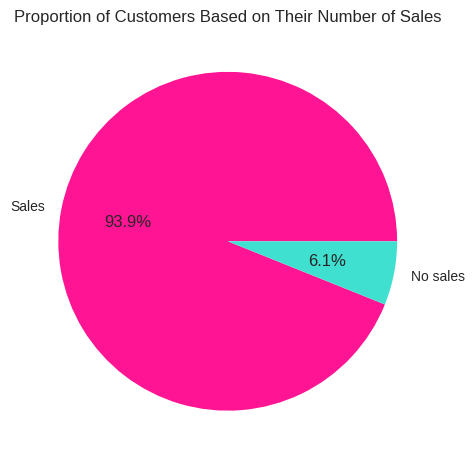

In [ ]:
# table to determine total sales and no sales customers
tbl =df_eda['no_sales'].value_counts()

# visualize using Pie chart (easily see the porpotion)
plt.pie(tbl, labels=tbl.index, colors=['deeppink','turquoise'],autopct='%1.1f%%')
plt.title('Proportion of Customers Based on Their Number of Sales')
plt.show()

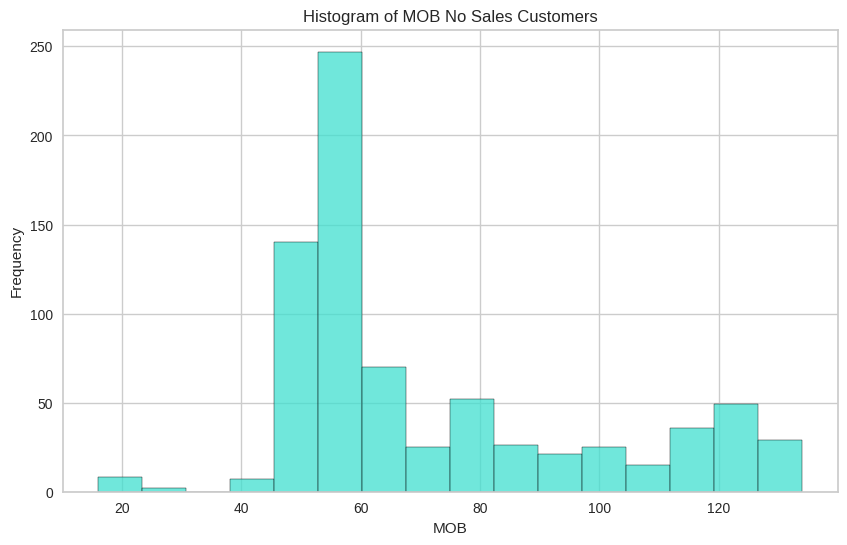

In [ ]:
# distribution MOB of customers with no sales in last 3 years
plt.figure(figsize=(10, 6))
sns.histplot(data=df_eda[df_eda['no_sales']=='No sales'], x='MOB', color='turquoise')
plt.title('Histogram of MOB No Sales Customers')
plt.xlabel('MOB')
plt.ylabel('Frequency')
plt.show()

**6.1%** customers didn't buy anything in last 3 years,

mostly come from customers that use RevoBank since **4-5 years ago**.

## 5.3. Analyze customers with high activity level

In [ ]:
# table to determine min, med, max mont since last sales
tbl2 = df_eda.groupby('account_activity_level')['month_since_last_sales'].agg(['min','median','max'])
# tbl2

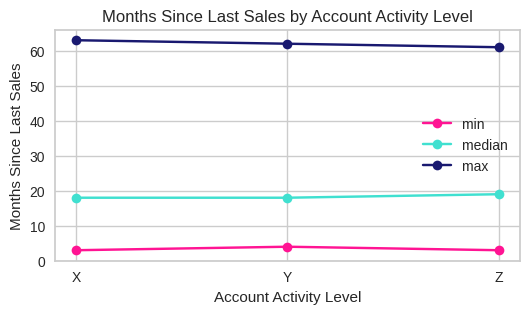

In [ ]:
# create stacked line chart
fig = plt.subplots(figsize = (6,3))
plt.plot(tbl2.index, tbl2['min'].values, label = 'min', color = 'deeppink', marker = 'o')
plt.plot(tbl2.index, tbl2['median'].values, label = 'median', color = 'turquoise', marker = 'o')
plt.plot(tbl2.index, tbl2['max'].values, label = 'max', color = 'midnightblue', marker = 'o')
plt.title('Months Since Last Sales by Account Activity Level')
plt.xlabel('Account Activity Level')
plt.ylabel('Months Since Last Sales')
plt.legend(loc = 'best')
plt.show()

considering value of minimum, median, and maximum of `months_since_last_sales`, there is **no difference** between customers with `account_activity_level` == X and the others.

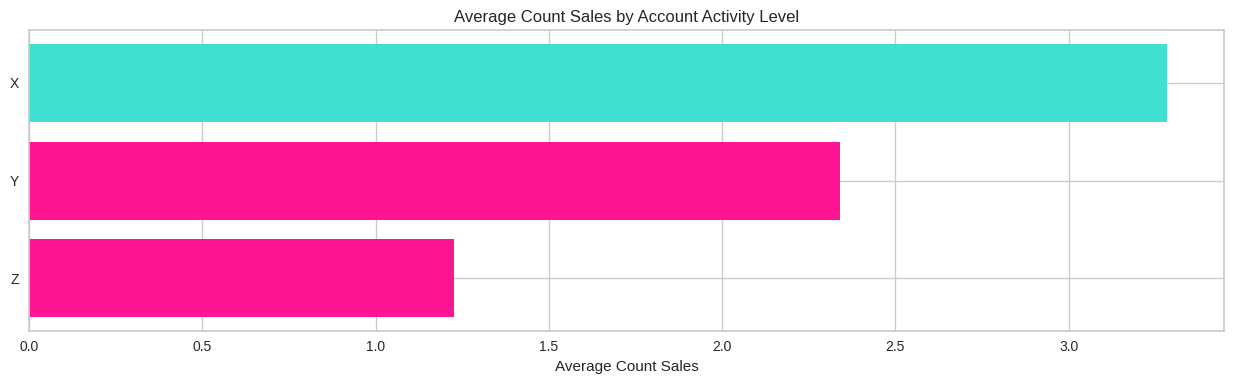

In [ ]:
# create groupby table
tbl3 = df_eda.groupby('account_activity_level')['cnt_sales_L36M'].mean().sort_values(ascending=True)

# create barh chart
fig, ax = plt.subplots(figsize = (12.5,4))
bars = ax.barh(tbl3.index, tbl3.values, color=['deeppink','deeppink','turquoise'])
# ax.bar_label(bars)
plt.title('Average Count Sales by Account Activity Level')
plt.xlabel('Average Count Sales')
plt.tight_layout()
plt.show()

Considering average count sales of high activity level customer, they **more active** than the others

## 5.4. Total profit group by gender

In [ ]:
# prepare data by 1) naming 2) calculate profit
df_eda['flag_female'] = df_eda['flag_female'].replace({1: 'Female', 0: 'Male'})
df_eda['profit'] = df_eda['total_sales']*0.024
df_eda.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,age,total_sales,no_sales,profit
0,100000006,X,A,91,Male,25000.0,1,25000.0,26,5,1996-11-03,27.0,25000.0,Sales,600.00
1,100000038,X,A,69,Male,9000.0,5,10000.0,25,10,1971-04-24,52.0,45000.0,Sales,1080.00
2,100000382,X,A,123,Female,17330.0,6,20000.0,18,6,1953-01-16,70.0,103980.0,Sales,2495.52
3,100000612,X,A,84,Female,25830.0,6,25000.0,14,7,1997-06-07,26.0,154980.0,Sales,3719.52
4,100000757,X,A,40,Male,25000.0,3,25000.0,17,5,1989-09-13,34.0,75000.0,Sales,1800.00


In [ ]:
# count total customers based on gender
df_eda['flag_female'].value_counts()

,count
flag_female,
Female,6679
Male,5679


In [ ]:
# Total profit based on gender
tbl4 = df_eda.groupby('flag_female')['profit'].sum()
tbl4

,profit
flag_female,
Female,5187164.64
Male,4475328.00


In [ ]:
# average sales based on gender
tbbl4 = df_eda.groupby('flag_female')['avg_sales_L36M'].mean()
tbbl4

,avg_sales_L36M
flag_female,
Female,13919.790388
Male,14626.953689


In [ ]:
print('The difference in profit earned by women and men is equal to', round(tbl4['Female']-tbl4['Male'],2), 'dollar')

The difference in profit earned by women and men is equal to 711836.64 dollar


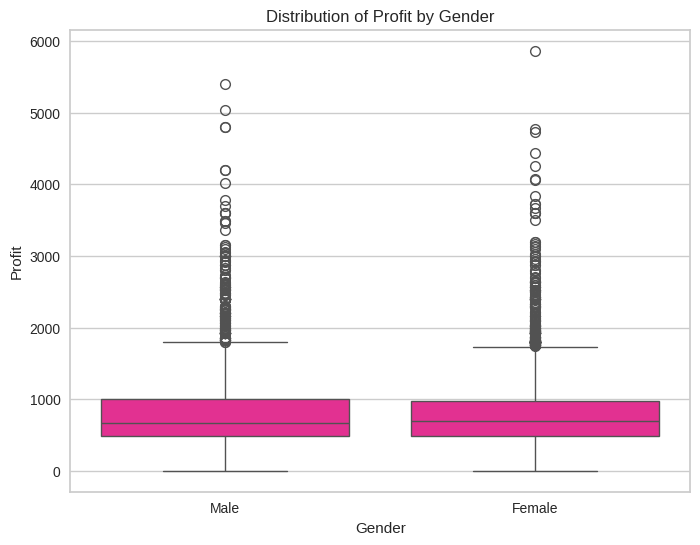

In [ ]:
# boxplot of profit group by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='flag_female', y='profit', data=df_eda, color='deeppink')
plt.title('Distribution of Profit by Gender')
plt.xlabel('Gender')
plt.ylabel('Profit')
plt.show()

Female customers lead in terms of profit compared to males with a difference of $711.836. But in **male customers spent more money** for evey transactions by considering the average sales.

However, the distribution of profits between male and female customers is **not significantly different**. Which means that the difference in profit is not because women spend more money in transactions, *but the number of total female customers is indeed more than male customers*.

## 5.5. Age group with the highest sales

In [ ]:
# lower bound customers age
min = df_eda['birth_date'].dt.year.min()

In [ ]:
# upper bound customers age
maks = df_eda['birth_date'].dt.year.max()
maks

2002

Customers age in range 21-77 years old

In [ ]:
# categorize customers by age group
df_eda['age_group'] = pd.cut(
    df_eda['birth_date'].dt.year,
    bins=[min, 1964, 1980, 1996, maks],
    labels=['Baby Boomers','Gen X', 'Gen Y', 'Gen Z'],
    right=False)
df_eda['age_group'].value_counts()

,count
age_group,
Baby Boomers,6273
Gen X,3667
Gen Y,2186
Gen Z,227


In [ ]:
# percentage of sales contributions
tbl5 = df_eda.groupby('age_group')['total_sales'].sum()
for i in range(len(tbl5)):
  print(tbl5.index[i],'contribute', round(tbl5.values[i]/total_sale*100,2),'% of total sales')

Baby Boomers contribute 51.37 % of total sales
Gen X contribute 30.06 % of total sales
Gen Y contribute 16.6 % of total sales
Gen Z contribute 1.96 % of total sales


<ipython-input-41-eea41d162122>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tbl5 = df_eda.groupby('age_group')['total_sales'].sum()


In [ ]:
# average count sales and average sales based on age group
tbl6 = df_eda.groupby('age_group')[['cnt_sales_L36M','avg_sales_L36M']].agg({'cnt_sales_L36M':'sum','avg_sales_L36M':'mean'})
tbl6

<ipython-input-42-0eb8ec2ccb67>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tbl6 = df_eda.groupby('age_group')[['cnt_sales_L36M','avg_sales_L36M']].agg({'cnt_sales_L36M':'sum','avg_sales_L36M':'mean'})


,cnt_sales_L36M,avg_sales_L36M
age_group,,
Baby Boomers,17939,13474.253148
Gen X,9039,15269.288247
Gen Y,5114,14887.099726
Gen Z,679,12909.295154


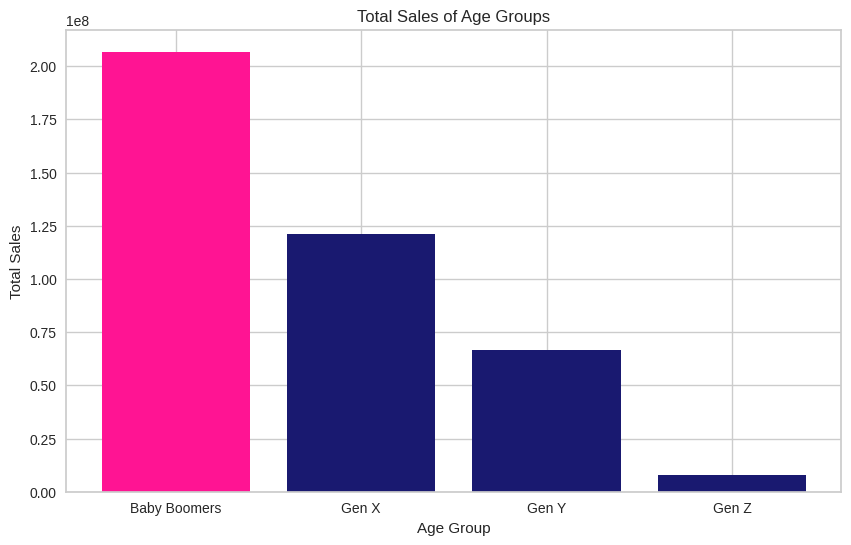

In [ ]:
# bar chart of total sales group by age groups
plt.figure(figsize=(10, 6))
plt.bar(tbl5.index, tbl5.values, color=['deeppink','midnightblue','midnightblue','midnightblue'])
plt.title('Total Sales of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.legend(loc = 'best')
plt.show()

**51.37%** total sales came from Baby boomers generation customers. This is because the total number of baby boomers customers is the largest, even though the average sales is not the highest.



## 5.6. Relation between count of promotion - total sales


In [ ]:
# total sales based on count of direct promotion
cond = df_eda['month_since_last_sales'] <=12
tbl7 = df_eda[cond].groupby('count_direct_promo_L12M')['total_sales'].mean()
# tbl7

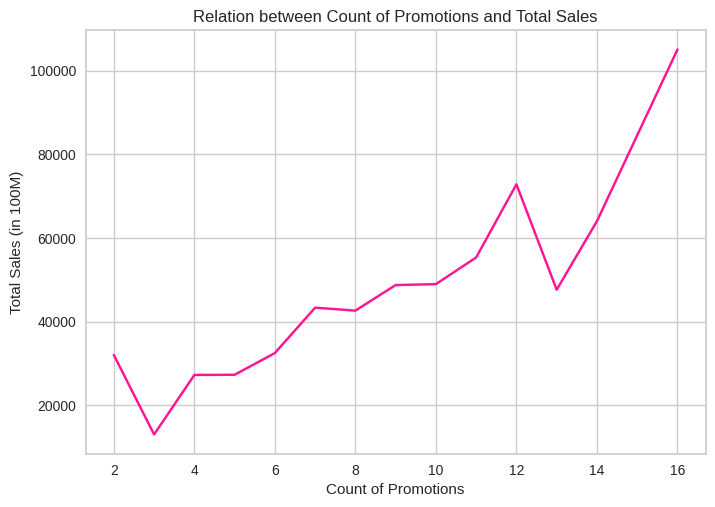

In [ ]:
# relation between total sales and direct promotion
plt.plot(tbl7.index, tbl7.values, color='deeppink')
plt.title('Relation between Count of Promotions and Total Sales')
plt.xlabel('Count of Promotions')
plt.ylabel('Total Sales (in 100M)')
plt.show()

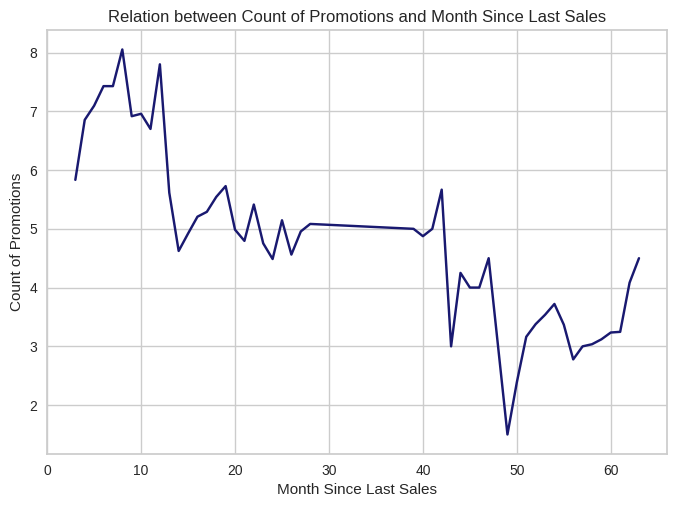

In [ ]:
# relation between month since last sales and promotion
tbl8 = df_eda.groupby('month_since_last_sales')['count_direct_promo_L12M'].mean()
plt.plot(tbl8.index, tbl8.values, color='midnightblue')
plt.title('Relation between Count of Promotions and Month Since Last Sales')
plt.xlabel('Month Since Last Sales')
plt.ylabel('Count of Promotions')
plt.show()

A positive relationship can be obtained between total sales and count of direct promotions. However, there is an interesting relationship between month since last sales and count of direct promotions. This plot shows that ***customers who have not used Revo Bank's services for a long time tend to get fewer direct promotions***.

# VI. Customer Segmentation using RFM🧋

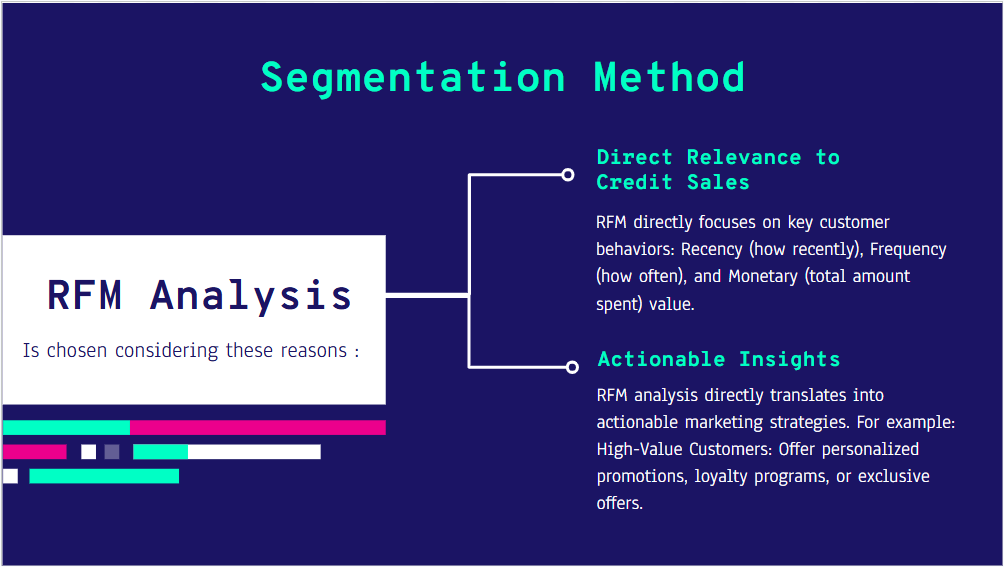

### 6.1. Data preparation

The data used in RFM segmentation needs to contain the following columns:


1.   Recency, measurement in months since last transaction. From df data frame we can define

    recency = `df['month_since_last_sales']`
2.   Frequency, measurement in count of transaction. From df data frame we can define

    frequency = `df['cnt_sales_L36M']`
3.   Monetary, measurement in the total amount of transaction. From df data frame we can define

    monetary = `df['avg_sales_L36M']`



In [ ]:
# data preparation
# step 1 : take required column
df_rfm = df_clean[['account_id','month_since_last_sales', 'cnt_sales_L36M', 'avg_sales_L36M']]
# step 2 : calculate recency, frequency, and monetary
df_rfm['recency'] = df_rfm['month_since_last_sales']
df_rfm['frequency'] = df_rfm['cnt_sales_L36M']
df_rfm['monetary'] = df_rfm['avg_sales_L36M']
# step 3 : only include RFM column
df_rfm = df_rfm[['recency','frequency','monetary']]
df_rfm.head(10)

<ipython-input-47-82e605d7c883>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['recency'] = df_rfm['month_since_last_sales']
<ipython-input-47-82e605d7c883>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['frequency'] = df_rfm['cnt_sales_L36M']
<ipython-input-47-82e605d7c883>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,recency,frequency,monetary
0,26,1,25000.0
1,25,5,9000.0
2,18,6,17330.0
3,14,6,25830.0
4,17,3,25000.0
5,18,4,9000.0
6,19,5,10000.0
7,24,2,25000.0
8,17,2,17500.0
9,18,4,9800.0


<Axes: ylabel='recency'>

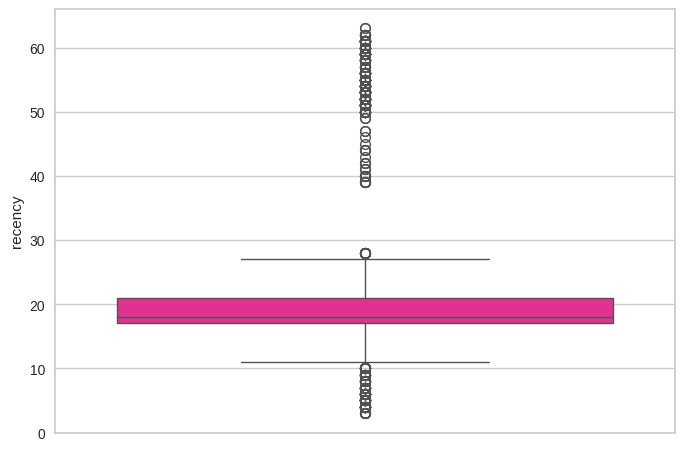

In [ ]:
sns.boxplot(df_rfm['recency'],color = 'deeppink')

<Axes: ylabel='frequency'>

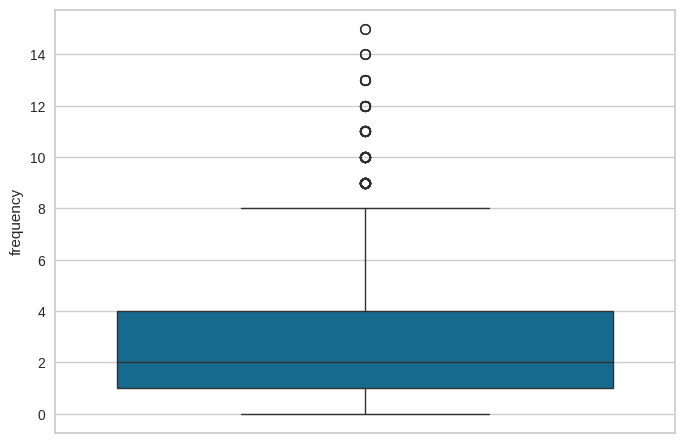

In [ ]:
sns.boxplot(df_rfm['frequency'])

<Axes: ylabel='monetary'>

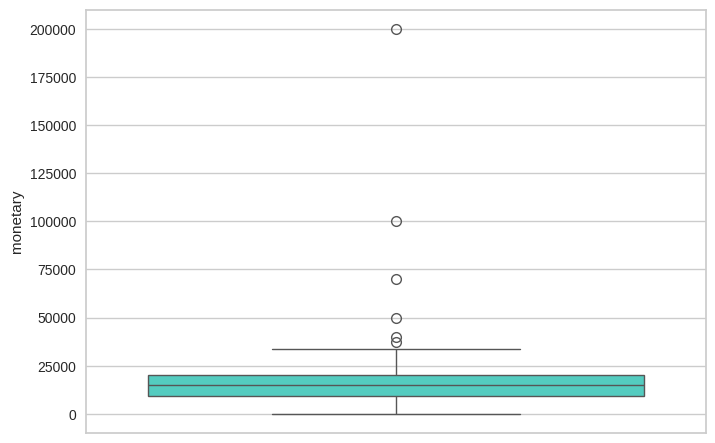

In [ ]:
sns.boxplot(df_rfm['monetary'], color = 'turquoise')

### 6.2. Define rank (1 to 5)

First, we will define RFM division using `pd.qcut()`

In [ ]:
# Check number of data for each bin
pd.qcut(df_rfm['recency'], q=5).value_counts()

,count
recency,
"(16.0, 18.0]",3679
"(2.999, 16.0]",2955
"(19.0, 23.0]",2546
"(23.0, 63.0]",2166
"(18.0, 19.0]",1012


**Recency rank**


1.   (91.31 - 487) --> the best
2.   (487.04 - 547.92)
3.   (547.92 - 578.36)
4.   (578.36 - 700.12)
5.   (700.12 - 1917.72) --> the worst

In [ ]:
# Now, let's try to bin frequency
pd.qcut(df_rfm['frequency'], q=5).value_counts()

,count
frequency,
"(-0.001, 1.0]",4662
"(1.0, 2.0]",2636
"(4.0, 15.0]",2141
"(2.0, 3.0]",1676
"(3.0, 4.0]",1243


**Frequency rank**


1.   (4 - 15) --> the best
2.   (3 - 4)
3.   (2 - 3)
4.   (1 - 2)
5.   (0) --> the worst

In [ ]:
# monetary binning
pd.qcut(df_rfm['monetary'], q=5).value_counts()

,count
monetary,
"(16670.0, 20000.0]",2712
"(8500.0, 10000.0]",2645
"(-0.001, 8500.0]",2501
"(10000.0, 16670.0]",2352
"(20000.0, 200000.0]",2148


**Monetary rank**


1.   (50000 - 244400) --> the best
2.   (33000 - 50000)
3.   (25000 - 33000)
4.   (18000 - 25000)
5.   (0 - 18000) --> the worst

In [ ]:
# define the rank
r_label = list(range(5,0,-1))
f_label = list(range(1,6))
m_label = list(range(1,6))

In [ ]:
# apply the rank
df_rfm['r_rank'] = pd.qcut(df_rfm['recency'], q=5, labels = r_label).astype('int')
df_rfm['f_rank'] = pd.qcut(df_rfm['frequency'], q=5, labels = f_label).astype('int')
df_rfm['m_rank'] = pd.qcut(df_rfm['monetary'], q=5, labels = m_label).astype('int')
df_rfm.head()

,recency,frequency,monetary,r_rank,f_rank,m_rank
0,26,1,25000.0,1,1,5
1,25,5,9000.0,1,5,2
2,18,6,17330.0,4,5,4
3,14,6,25830.0,5,5,5
4,17,3,25000.0,4,3,5


In [ ]:
# define each rfm_score = r_rank + f_rank + m_rank
df_rfm['rfm_score'] = df_rfm['r_rank'].astype(str) + df_rfm['f_rank'].astype(str) + df_rfm['m_rank'].astype(str)
df_rfm.head()

,recency,frequency,monetary,r_rank,f_rank,m_rank,rfm_score
0,26,1,25000.0,1,1,5,115
1,25,5,9000.0,1,5,2,152
2,18,6,17330.0,4,5,4,454
3,14,6,25830.0,5,5,5,555
4,17,3,25000.0,4,3,5,435


### 6.3. Define segments using rfm_score

However, we typically do not interpret the RFM score by the score only. We typically map with a predefined segments (example: https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit?usp=sharing)

In [ ]:
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1Aqehai_TsPLH_Lo8vFz80rcZ54OQSq3MTpMKimll6TU/edit#gid=884117664'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')
rfm_segments = pd.read_csv(GSHEET_URL_CSV)

rfm_segments['rfm_score'] = rfm_segments['rfm_score'].astype(str)

In [ ]:
# merge rfm_segments to df_rfm
df_rfm_result = pd.merge(
    left=df_rfm,
    right=rfm_segments,
    how='left',
    left_on=['rfm_score'],
    right_on=['rfm_score']
)

In [ ]:
df_rfm_result.head()

,recency,frequency,monetary,r_rank,f_rank,m_rank,rfm_score,segment,Activity,Actionable
0,26,1,25000.0,1,1,5,115,Can’t Lose Them,"Made biggest purchases, and often. But haven’t...","Win them back via renewals or newer products, ..."
1,25,5,9000.0,1,5,2,152,At Risk,Spent big money and purchased often. But long ...,"Send personalized emails to reconnect, offer r..."
2,18,6,17330.0,4,5,4,454,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
3,14,6,25830.0,5,5,5,555,Champions,"Bought recently, buy often and spend the most!",Reward them. Can be early adopters for new pro...
4,17,3,25000.0,4,3,5,435,Loyal Customers,Spend good money with us often. Responsive to ...,Upsell higher value products. Ask for reviews....


In [ ]:
# Add segment column in df_clean
df_segmented = pd.concat([df_clean, df_rfm_result['segment']], axis=1)
df_segmented.head()

,account_id,account_activity_level,customer_value_level,MOB,flag_female,avg_sales_L36M,cnt_sales_L36M,last_sales,month_since_last_sales,count_direct_promo_L12M,birth_date,age,segment
0,100000006,X,A,91.0,0.0,25000.0,1.0,25000.0,26.0,5.0,1996-11-03,27.0,Can’t Lose Them
1,100000038,X,A,69.0,0.0,9000.0,5.0,10000.0,25.0,10.0,1971-04-24,52.0,At Risk
2,100000382,X,A,123.0,1.0,17330.0,6.0,20000.0,18.0,6.0,1953-01-16,70.0,Champions
3,100000612,X,A,84.0,1.0,25830.0,6.0,25000.0,14.0,7.0,1997-06-07,26.0,Champions
4,100000757,X,A,40.0,0.0,25000.0,3.0,25000.0,17.0,5.0,1989-09-13,34.0,Loyal Customers


## 6.4. Segmentation Interpretation

### 6.4.1. Segments distribution

Text(0.5, 1.0, 'Segments Distribution')

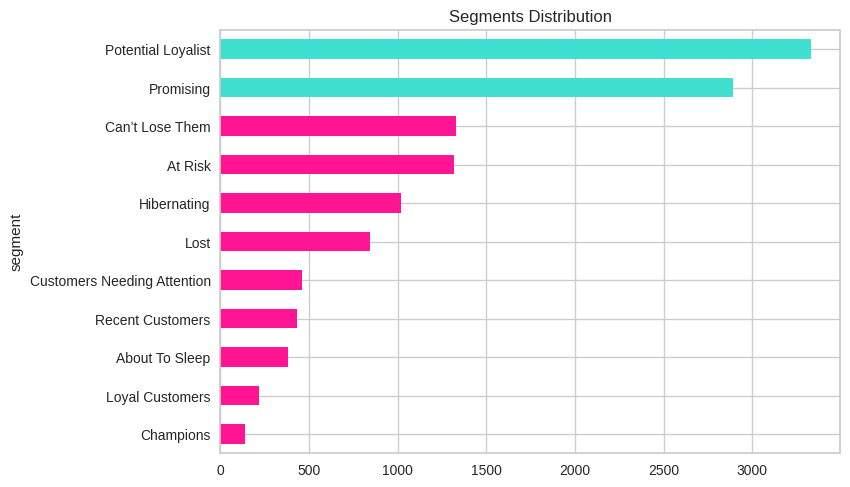

In [ ]:
df_rfm_result['segment'].value_counts().sort_values(ascending=True).plot(kind = 'barh', color = ['deeppink','deeppink','deeppink','deeppink','deeppink','deeppink','deeppink','deeppink','deeppink','turquoise','turquoise'])
plt.title('Segments Distribution')

In [ ]:
# create scatter plot 3d
fig = px.scatter_3d(df_rfm_result, x='recency', y='frequency', z='monetary', color='segment')
fig.show()

### 6.4.2. High Value Customers

Text(0, 0.5, 'Average Monetary Value')

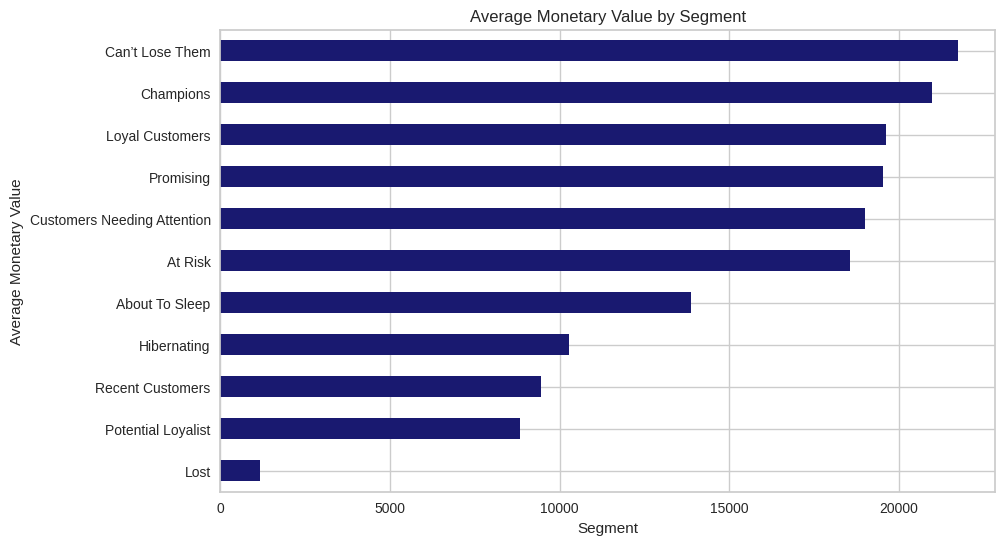

In [ ]:
# customer with high avg sales
plt.figure(figsize=(10, 6))
df_rfm_result.groupby('segment')['monetary'].mean().sort_values(ascending=True).plot(kind = 'barh', color = 'midnightblue')
plt.title('Average Monetary Value by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Monetary Value')

Text(0, 0.5, 'Total Sales')

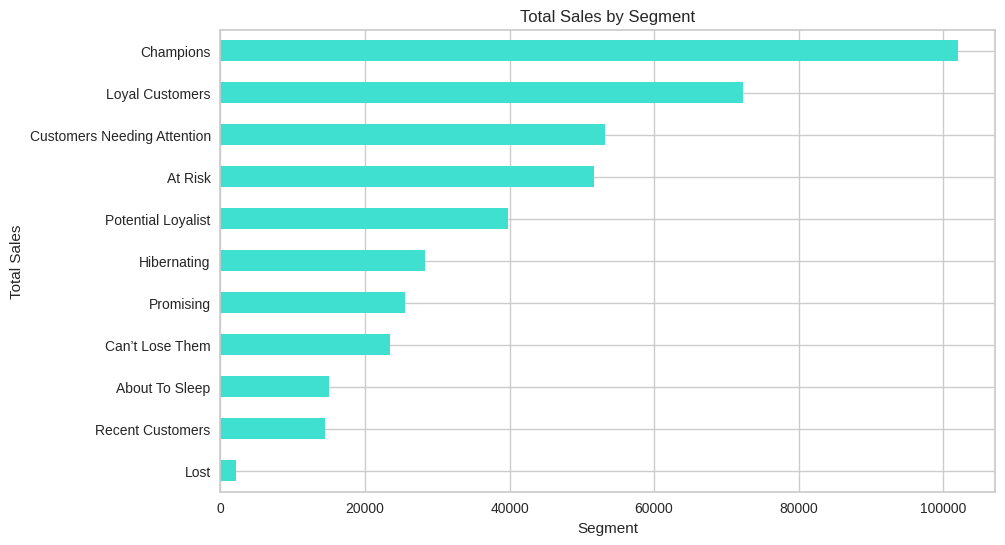

In [ ]:
# customer with high total sales
df_c = df_rfm_result.copy()
df_c['total sales'] = df_c['monetary'] * df_c['frequency']
plt.figure(figsize=(10, 6))
df_c.groupby('segment')['total sales'].mean().sort_values(ascending=True).plot(kind = 'barh', color = 'turquoise')
plt.title('Total Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')

Customer with higher average sales is classified as Can’t Lose Them (they had been done big amount of transaction, but long time not back). But considering total sales in last 3 years, Champions segment generate the most revenue. Because Champions customer purchased more than one time in last 3 years.

### 6.4.3. The most recent and frequent purchased customers

In [ ]:
df_rfm_result.groupby('segment')['recency'].mean()

,recency
segment,
About To Sleep,20.676316
At Risk,22.863118
Can’t Lose Them,22.757143
Champions,16.057554
Customers Needing Attention,17.490196
Hibernating,21.652901
Lost,50.579384
Loyal Customers,17.290909
Potential Loyalist,16.433634


Text(0, 0.5, 'Month since last sales')

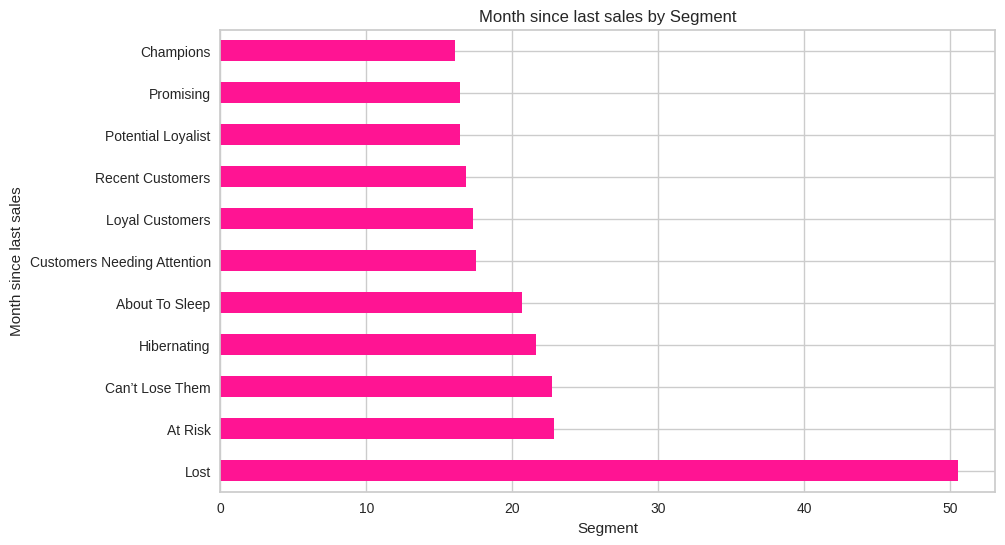

In [ ]:
# customer with most recent sales
plt.figure(figsize=(10, 6))
df_rfm_result.groupby('segment')['recency'].mean().sort_values(ascending=False).plot(kind = 'barh', color = 'deeppink')
plt.title('Month since last sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Month since last sales')

Text(0, 0.5, 'Count of Sales')

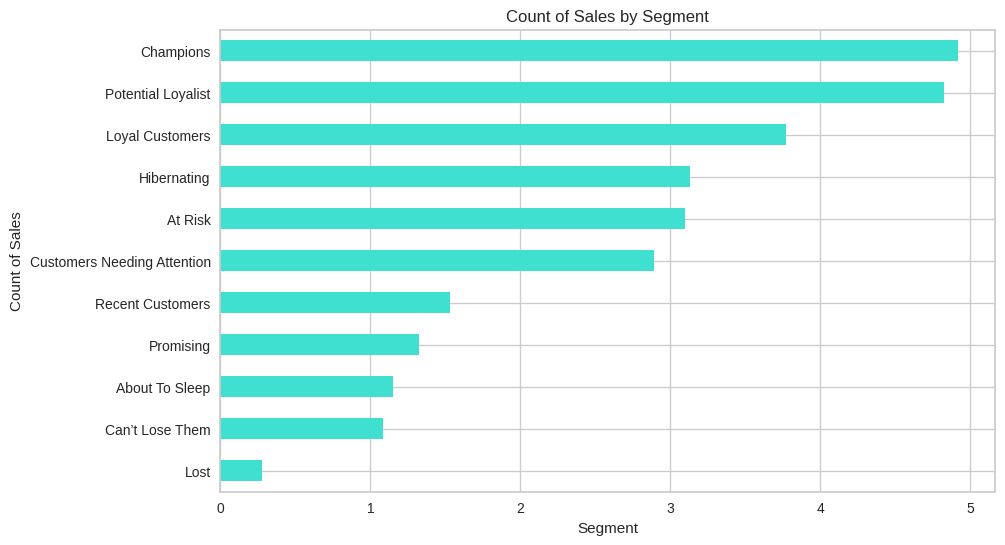

In [ ]:
# customer with most frequent sales
plt.figure(figsize=(10, 6))
df_rfm_result.groupby('segment')['frequency'].mean().sort_values(ascending=True).plot(kind = 'barh', color = 'Turquoise')
plt.title('Count of Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Count of Sales')

In [ ]:
df_rfm_result.groupby('segment')['frequency'].mean().sort_values(ascending=True)

,frequency
segment,
Lost,0.278436
Can’t Lose Them,1.087218
About To Sleep,1.147368
Promising,1.326651
Recent Customers,1.533643
Customers Needing Attention,2.893246
At Risk,3.095057
Hibernating,3.128810
Loyal Customers,3.772727


Champions dan potential loyalist customer are the most often segments for doing transaction in last 3 years. On average, they made transaction about once in 7 months. Even though potential loyalist customers, didn’t spend as much as Champions.

### 6.4.4. Ratio of no sales

In [ ]:
tbl1 = df_segmented.copy()
tbl1['no_sales'] = pd.cut(
    df_segmented['avg_sales_L36M']*df_segmented['cnt_sales_L36M'],
    bins=[-1, 0, max_sales],
    labels=['No sales', 'Sales'])
no_sale = tbl1.groupby('segment')['no_sales'].value_counts(normalize = True)
segments = no_sale.index.get_level_values(0).unique()

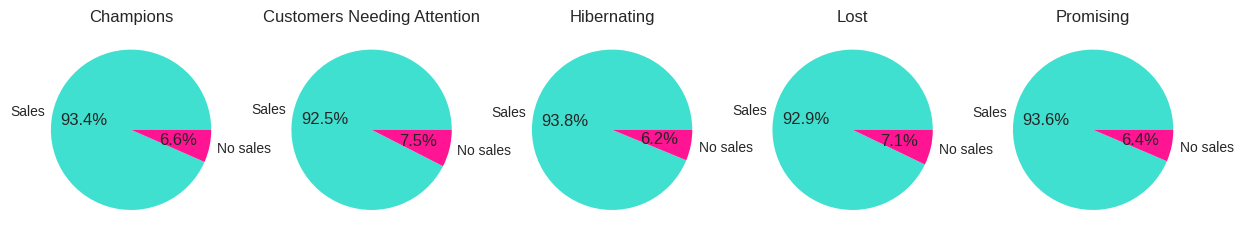

In [ ]:
# pie chart of segments with >7% no sales customers
fig, axes = plt.subplots(1, 5, figsize=(15, 6))
i = 0
for segmnt in segments:
  tbl = tbl1[tbl1['segment'] == segmnt]['no_sales'].value_counts(normalize = True)
  if tbl['No sales'] > 0.062:
    axes[i].pie(tbl, labels=tbl.index, colors=['turquoise', 'deeppink'], autopct='%1.1f%%')
    axes[i].set_title(segmnt)
    i+=1

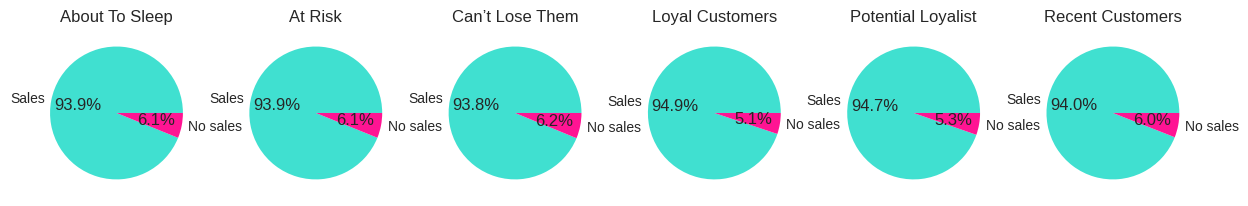

In [ ]:
# pie chart of segments with >7% no sales customers
fig, axes = plt.subplots(1, 6, figsize=(15, 6))
i = 0
for segmnt in segments:
  tbl = tbl1[tbl1['segment'] == segmnt]['no_sales'].value_counts(normalize = True)
  if 0.05 < tbl['No sales'] < 0.062:
    axes[i].pie(tbl, labels=tbl.index, colors=['turquoise', 'deeppink'], autopct='%1.1f%%')
    axes[i].set_title(segmnt)
    i+=1

# **VII. Insights from Revo Bank's 3-Year Performance** 🌅


## 6.1. Overall Performance

1. **Total Sales**: Revo Bank generated a substantial $402.603.860 in Total sales over the past three years.

2. **High Transaction Frequency**: With 12,358 customers, the bank processed 32,777 transactions, indicating high customer activity.

3. **Average Transaction Value**: Each customer, on average, yielded $32,578 in total sales.



## 6.2. Customers

1. **Inactive Customers:** Approximately 6.1% of customers remained inactive, particularly those who have been with the bank for 4-5 years.

2. **Customer Activity:** Customer activity levels didn't significantly vary based on recent transaction history. However, high-activity customers exhibited significantly higher average transaction values.

3. **Gender:** While female customers outnumber male customers, male customers tend to spend more per transaction. However, female customers collectively contribute more to overall profit, totaling $711,836.

4. **Generational Insights:** Baby Boomers, despite not having the highest average transaction value, contributed the most to total sales (51.37%) due to their sheer number.


## 6.3. Promotions

1. **Promotion and Sales:** No direct correlation was found between the number of direct promotions and total sales.

2. **Promotion Frequency:** Customers who had not used Revo Bank's services for an extended period received fewer direct promotions.

## 6.4. Customer Segmentations

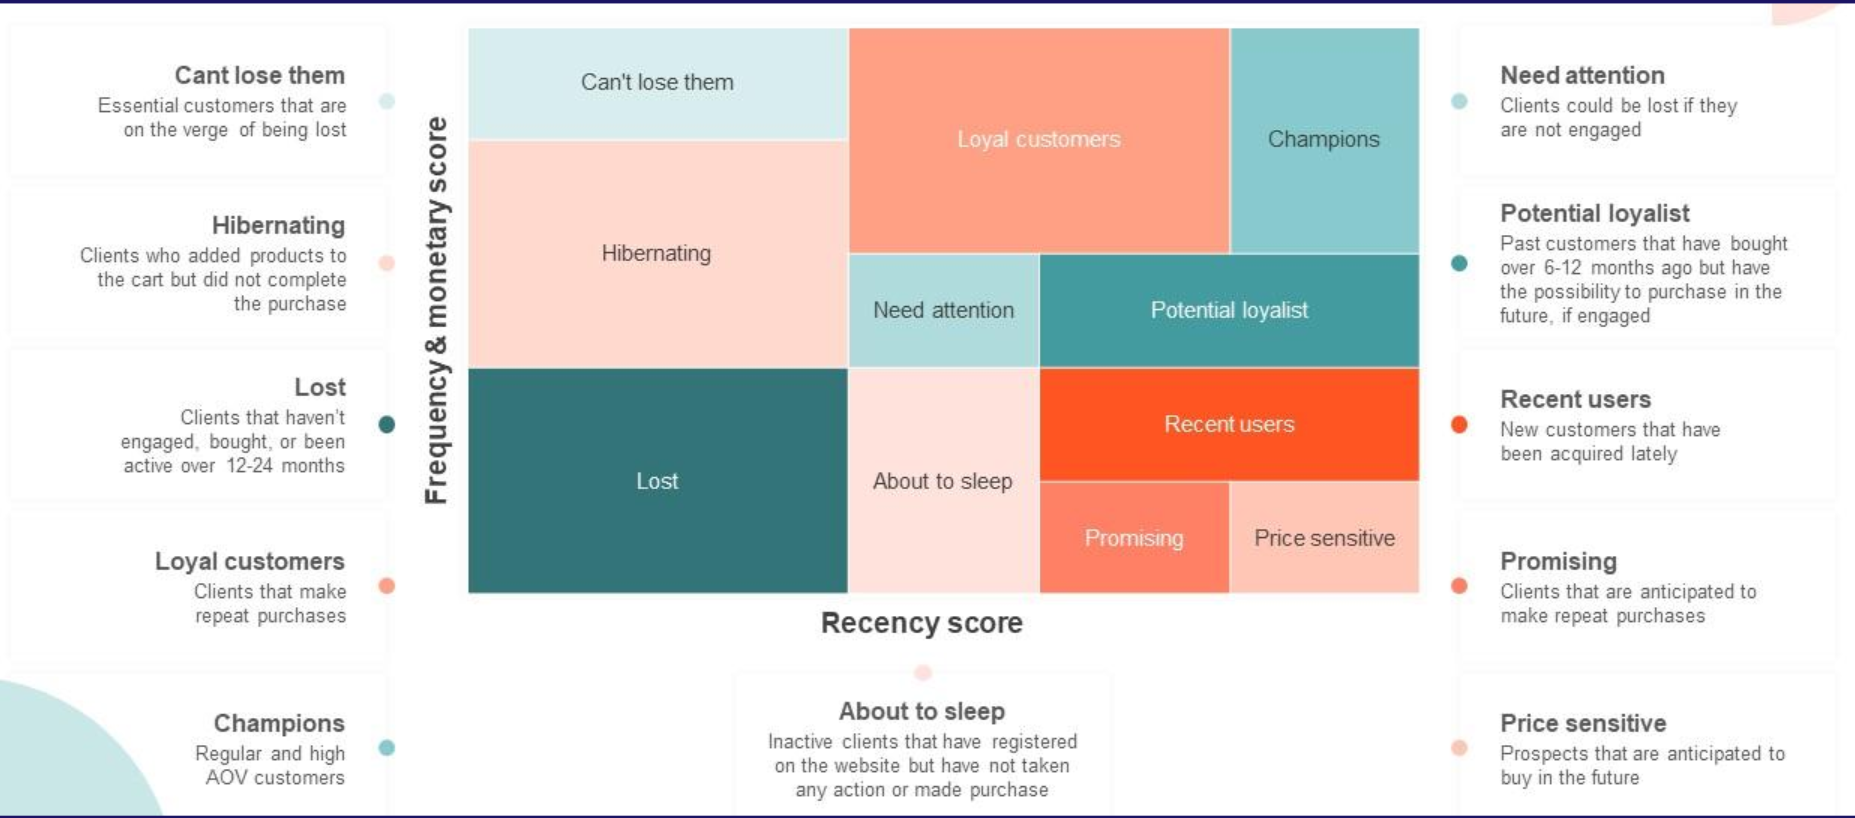



1.   Customer with higher average sales is classified as Can’t Lose Them (they had been done big amount of transaction, but long time not back). But considering total sales in last 3 years, Champions segment generate the most revenue. Because Champions customer purchased more than one time in last 3 years.

2.   Champions dan potential loyalist customer are the most often segments for doing transaction in last 3 years. On average, they made transaction about once in 7 months. Even though potential loyalist customers, didn’t spend as much as Champions.

3. On average, all segments make transactions under 2 years. Except for lost customers who exceeded 4 years. And the most recent sales is done by the champions customer with the last sales made in January 2022 (16 months ago).

4. We already know that overall customers, there are 6.1% who do not make sales. So we can filter segments whose no sales ratio is > 6.1%. And the highest is need attention and lost customers.


